# Extract Basin Centroids

This notebook extracts centroid coordinates from basin geometry files and finds the nearest NOAA GEFS grid points for use in forecast data extraction.

## Overview

The process consists of the following steps:
1. Load basin boundary geometries from shapefiles in a directory
2. Calculate centroid coordinates for each basin
3. Connect to the NOAA GEFS dataset to get grid coordinates
4. Find the nearest GEFS grid point to each basin centroid
5. Save the basin centroids with grid points to a CSV file

In [1]:
# Import required libraries
import os
import sys
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from shapely.geometry import Point
import warnings

# Add the src directory to the Python path so we can import our modules
sys.path.append('../src')
from extract_basin_centroids import (
    load_basin_boundaries,
    calculate_basin_centroids,
    plot_basins_and_centroids,
    connect_to_gefs_dataset,
    find_nearest_grid_points,
    plot_grid_points_analysis,
    save_to_csv
)

# Suppress warnings
warnings.filterwarnings('ignore', message='The specified chunks')

## Define File Paths

In [2]:
# Define paths for input and output data
basin_dir_path = "../data/basin_shapefiles"  # Directory containing basin boundary shapefiles
output_dir = "../data"
output_file = os.path.join(output_dir, "basin_centroids_with_grid_points.csv")

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

print(f"Basin directory path: {basin_dir_path}")
print(f"Output will be saved to: {output_file}")

Basin directory path: ../data/basin_shapefiles
Output will be saved to: ../data/basin_centroids_with_grid_points.csv


## Load Basin Geometries

Found 5 shapefiles in directory
Loading innerste_reservoir_catchment.shp...
  No basin name field found in innerste_reservoir_catchment.shp. Using index as basin ID.
  Added 1 basins from innerste_reservoir_catchment.shp
Loading oker_reservoir_catchment.shp...
  No basin name field found in oker_reservoir_catchment.shp. Using index as basin ID.
  Added 1 basins from oker_reservoir_catchment.shp
Loading ecker_reservoir_catchment.shp...
  No basin name field found in ecker_reservoir_catchment.shp. Using index as basin ID.
  Added 1 basins from ecker_reservoir_catchment.shp
Loading soese_reservoir_catchment.shp...
  No basin name field found in soese_reservoir_catchment.shp. Using index as basin ID.
  Added 1 basins from soese_reservoir_catchment.shp
Loading grane_reservoir_catchment.shp...
  No basin name field found in grane_reservoir_catchment.shp. Using index as basin ID.
  Added 1 basins from grane_reservoir_catchment.shp
Loaded a total of 5 basin boundaries from all shapefiles


,LABEL,geometry,basin_name,catch_name,name_catch,layer,path
0,1,"POLYGON ((10.29069 51.9046, 10.29069 51.90458,...",innerste_reservoir_catchment_Basin_0,NaN,NaN,NaN,NaN
1,1,"POLYGON ((10.45931 51.85123, 10.47153 51.84978...",oker_reservoir_catchment_Basin_0,NaN,NaN,NaN,NaN
2,1,"POLYGON ((10.58208 51.84431, 10.58347 51.84431...",ecker_reservoir_catchment_Basin_0,Ecker,Ecker,NaN,NaN
3,1,"POLYGON ((10.30806 51.74208, 10.30792 51.74208...",soese_reservoir_catchment_Basin_0,NaN,NaN,NaN,NaN
4,1,"POLYGON ((10.37486 51.91246, 10.37653 51.91245...",grane_reservoir_catchment_Basin_0,NaN,NaN,catchment,Y:/Aktenplan/2 Projekte/2.065_PROWAVE/06 Proje...


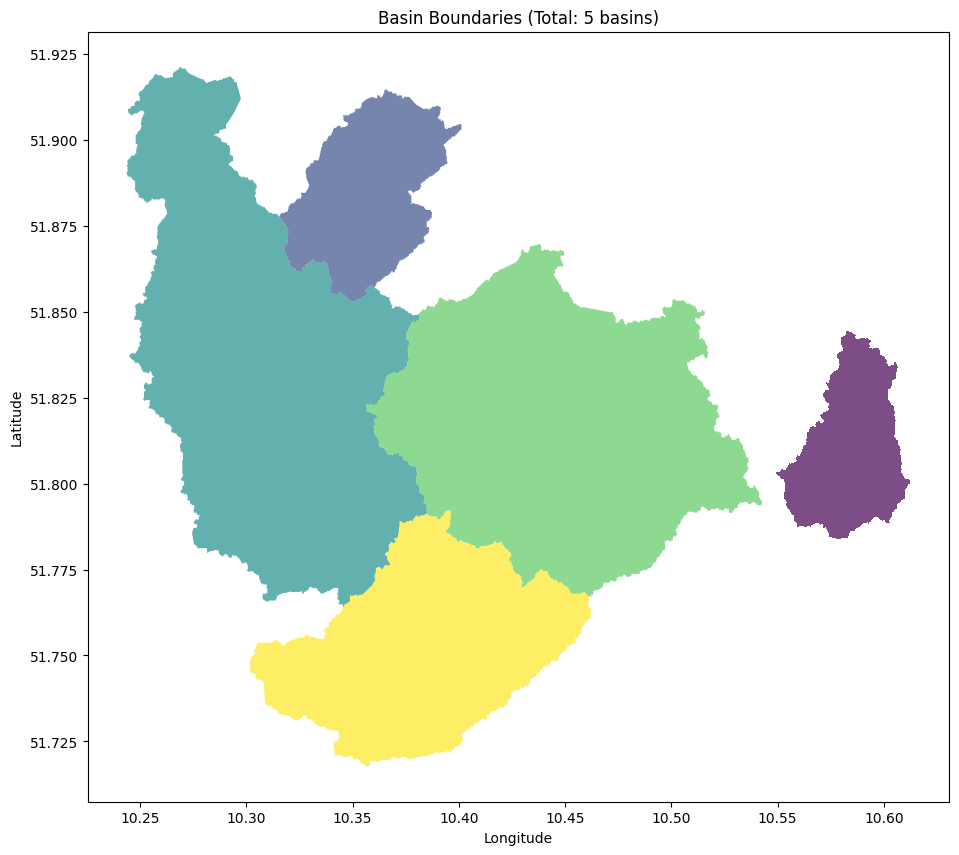

In [3]:
# Load basin boundary data from all shapefiles in the directory
basins = load_basin_boundaries(basin_dir_path)

# Display the first few rows of the basin data
if basins is not None:
    display(basins.head())
    # Plot the basins to verify they loaded correctly
    fig, ax = plt.subplots(figsize=(12, 10))
    basins.plot(ax=ax, column='basin_name', legend=False, alpha=0.7, cmap='viridis')
    plt.title(f"Basin Boundaries (Total: {len(basins)} basins)")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

## Calculate Basin Centroids

Calculated centroids for 5 basins
                             basin_name  centroid_lat  centroid_lon
0  innerste_reservoir_catchment_Basin_0     51.834451     10.307828
1      oker_reservoir_catchment_Basin_0     51.816468     10.447276
2     ecker_reservoir_catchment_Basin_0     51.810056     10.584058
3     soese_reservoir_catchment_Basin_0     51.752310     10.383225
4     grane_reservoir_catchment_Basin_0     51.884391     10.357203


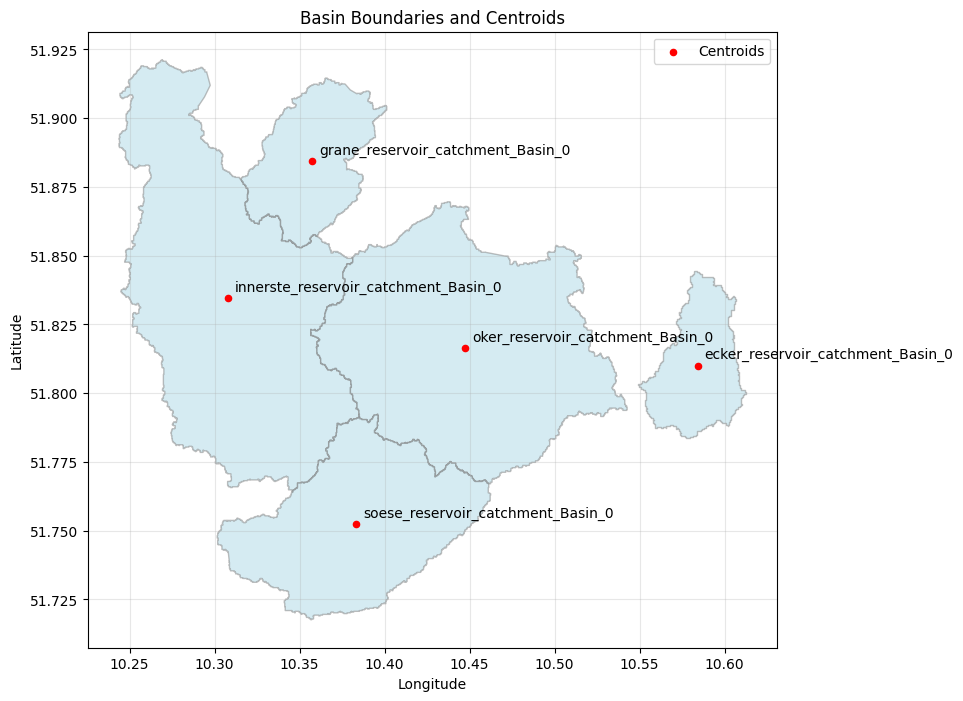

In [4]:
# Calculate basin centroids
centroids = calculate_basin_centroids(basins)

# Plot basins and centroids
plot_basins_and_centroids(basins, centroids)

## Connect to NOAA GEFS Dataset to Find Grid Points

In [5]:
# Connect to the GEFS dataset to get grid coordinates
# Replace with your own email address to comply with usage tracking
lats, lons = connect_to_gefs_dataset("your.email@example.com")

Connecting to NOAA GEFS dataset to get grid coordinates...
GEFS dataset grid: 721 latitudes × 1440 longitudes
Latitude range: -90.0 to 90.0
Longitude range: -180.0 to 179.75


## Find Nearest GEFS Grid Points to Basin Centroids

Found nearest grid points for 5 basin centroids
Average distance to nearest grid point: 10.02 km
Maximum distance to nearest grid point: 14.81 km
                             basin_name  centroid_lat  centroid_lon  \
0  innerste_reservoir_catchment_Basin_0     51.834451     10.307828   
1      oker_reservoir_catchment_Basin_0     51.816468     10.447276   
2     ecker_reservoir_catchment_Basin_0     51.810056     10.584058   
3     soese_reservoir_catchment_Basin_0     51.752310     10.383225   
4     grane_reservoir_catchment_Basin_0     51.884391     10.357203   

  nearest_lat nearest_lon grid_distance_km  
0       51.75       10.25        10.198042  
1       51.75        10.5          8.23283  
2       51.75        10.5         8.833746  
3       51.75        10.5         8.042719  
4        52.0       10.25        14.807236  


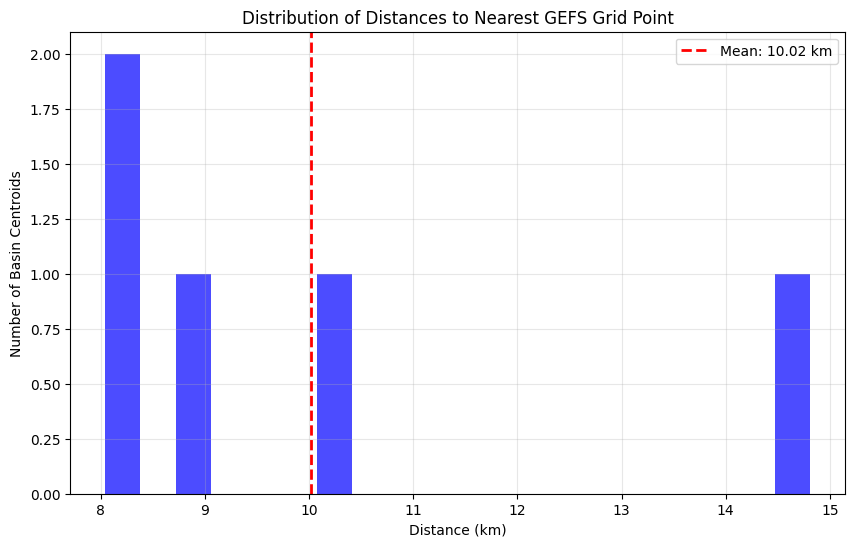

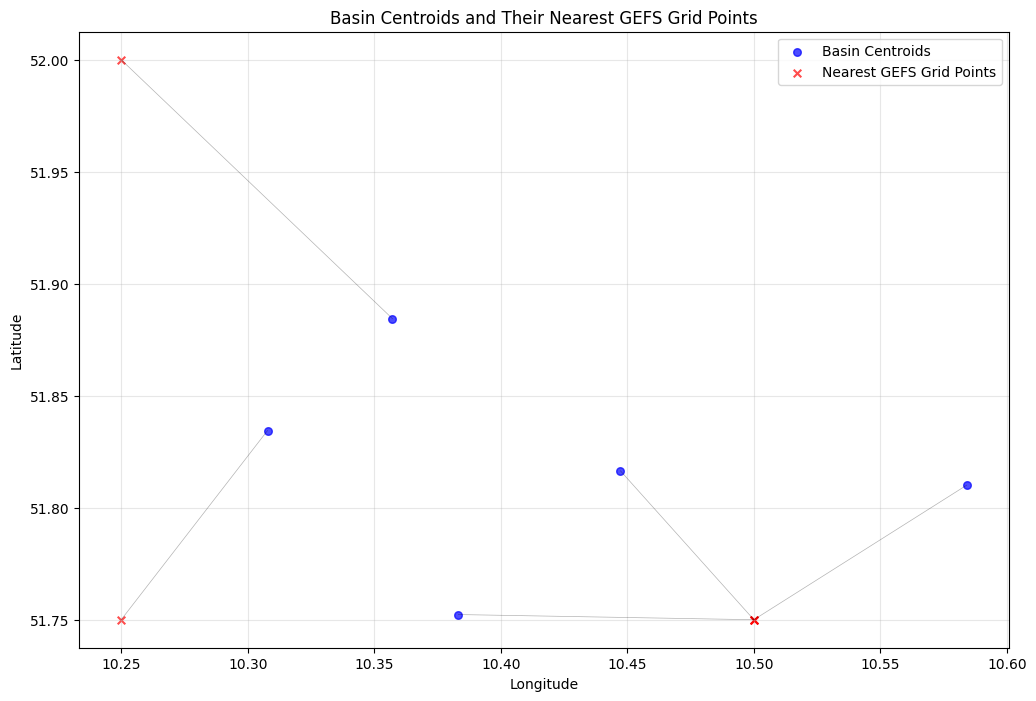

In [6]:
# Find the nearest GEFS grid points to each basin centroid
centroids_with_grid = find_nearest_grid_points(centroids, lats, lons)

# Plot analysis of grid points
plot_grid_points_analysis(centroids_with_grid)

## Save Results to CSV File

In [7]:
# Save the basin centroids with grid points to CSV
save_to_csv(centroids_with_grid, output_file)

Saved 5 basin centroids with grid points to ../data/basin_centroids_with_grid_points.csv


## Conclusion

This notebook has:
1. Loaded basin boundary geometries from shapefiles in a directory
2. Calculated centroid coordinates for each basin
3. Connected to the NOAA GEFS dataset to get grid coordinates
4. Found the nearest GEFS grid point to each basin centroid
5. Saved the basin centroids with grid points to a CSV file

The output file `basin_centroids_with_grid_points.csv` will be used by the `fetch_basin_forecasts.ipynb` notebook to retrieve forecast data for each basin.